 ## <span style="color: blue;">USED CARS SALES MODEL</span>
 
*Problem Statement:*

Included in the training dataset is information on used cars previously sold. Each row corresponds to one used car listing. The first column of the data contains a unique identifier for the listing. The next twenty-six columns contain information on parameters relevant to the transaction, with those parameters described in more detail in the appendix attached. Finally, the last two columns of the “Training_dataset.csv” contain information on “Vehicle_Trim” and “Dealer_Listing_Price”, which describe the trim of the vehicle involved in the sale, and the price at which the vehicle was listed by the dealer.

**Your challenge is to build one or more models, through whatever means you find most appropriate, capable of predicting vehicle trim and dealer listing price given the other twenty-six variables provided.**

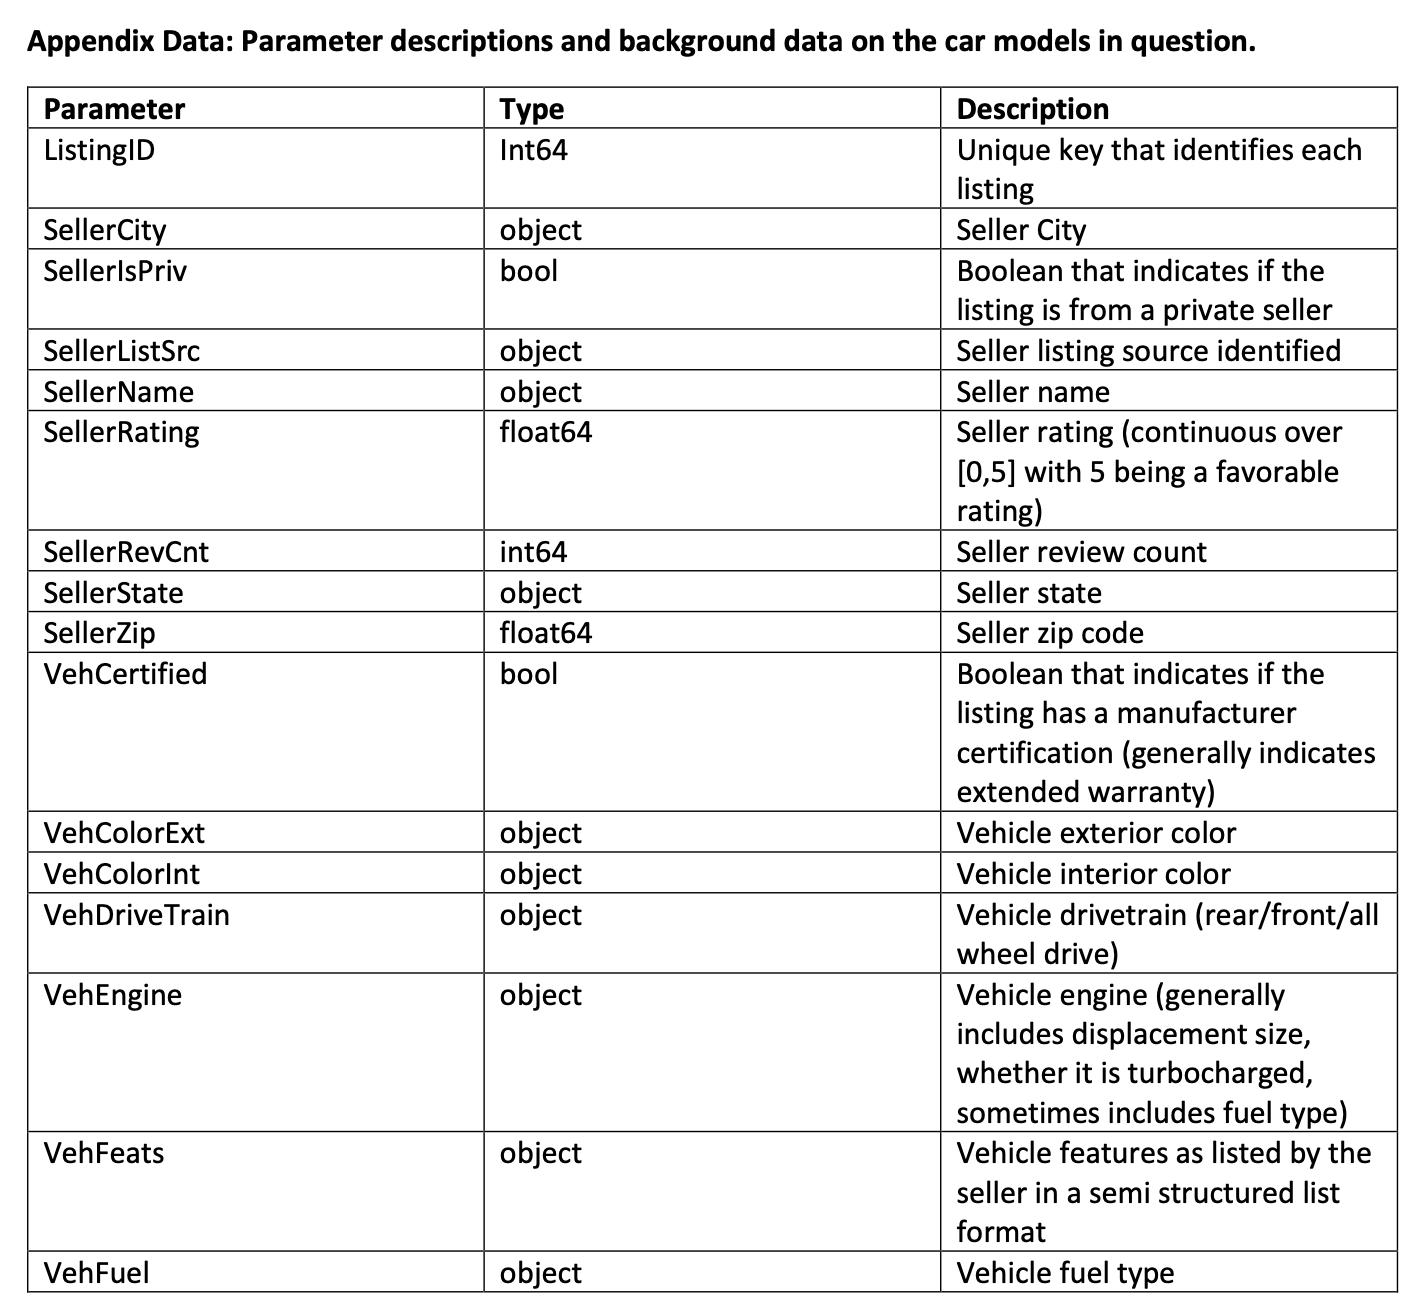
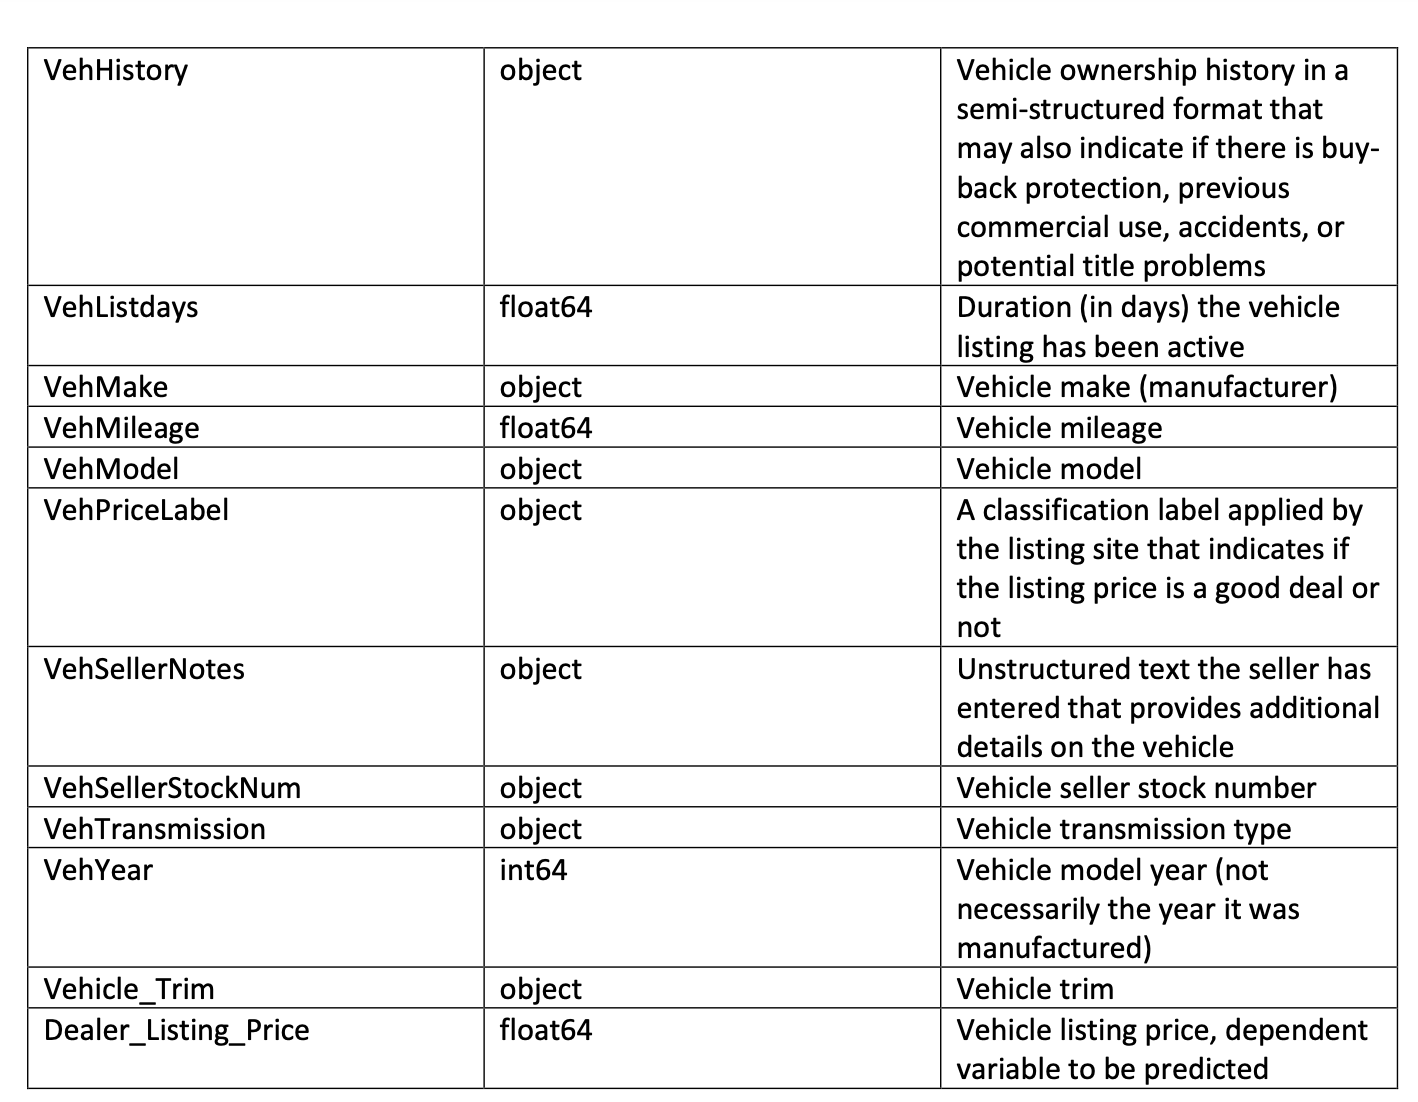

### -Loading Data: 

**<span style="color: blue;">Let's import our data files and make an initial exploration on how they look like, having the definitions given above.</span>**

In [1067]:
# we will start with these tools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as ss
import warnings
from IPython.display import display
#interactive visualization tools
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

In [1425]:

train=pd.read_csv('/Users/murat/Desktop/DS/Boeing/Training_DataSet.csv')

In [1426]:
test=pd.read_csv('/Users/murat/Desktop/DS/Boeing/Test_Dataset.csv')

In [1070]:
train.head(2)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0


In [1071]:
#Looking into the size of our data set
train.shape

(6298, 29)

In [1072]:
#removing the ListingID:
train=train.drop('ListingID', axis=1);


In [1073]:
#Full list of Columns, Data types and NonNull counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SellerCity            6298 non-null   object 
 1   SellerIsPriv          6298 non-null   bool   
 2   SellerListSrc         6296 non-null   object 
 3   SellerName            6298 non-null   object 
 4   SellerRating          6298 non-null   float64
 5   SellerRevCnt          6298 non-null   int64  
 6   SellerState           6298 non-null   object 
 7   SellerZip             6296 non-null   float64
 8   VehBodystyle          6298 non-null   object 
 9   VehCertified          6298 non-null   bool   
 10  VehColorExt           6225 non-null   object 
 11  VehColorInt           5570 non-null   object 
 12  VehDriveTrain         5897 non-null   object 
 13  VehEngine             5937 non-null   object 
 14  VehFeats              6023 non-null   object 
 15  VehFuel              

In [1074]:
train=train.drop(columns=['SellerCity','SellerName','SellerZip'], axis=1);


In [1075]:
#A quick view on numerical features:
train.describe()

,SellerRating,SellerRevCnt,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6298.000000,6298.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.138346,434.565576,56.143670,26369.364358,2016.792633,32265.053314
std,1.188033,1274.257411,68.301329,13036.568712,1.206566,7538.339005
min,0.000000,0.000000,0.293102,0.000000,2015.000000,18289.000000
25%,4.000000,28.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.600000,126.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,4.800000,401.000000,74.139769,36468.500000,2018.000000,35991.000000
max,5.000000,14635.000000,820.684375,83037.000000,2019.000000,89500.000000


**Note:** 

 

- SellerZip's can be misleading as it is given as a numerical value. After further evaluation, I decided to remove it and keep the state information only.

- Additionaly, ListingID, SellerName, SellerZip, SellerCity are eliminated.

- Also for the SellerRating "0" values should be checked. Since it is most like becouse the customers did not rate, not becouse they rated worse as 0!

In [1076]:
#Checking for ZipCodes and might later check if it is an important feature on the predictions.And will consider later to remove it or keep it

zips=train['SellerZip'].value_counts()>20
zips
zips[zips].index.to_list();


KeyError: 'SellerZip'

### -Missing Values:
**<span style="color: blue;">There are 6298 entries, with some missing values. Let's look at which features have missing and how much.</span>**

In [1077]:
train.isna().sum()


SellerIsPriv              0
SellerListSrc             2
SellerRating              0
SellerRevCnt              0
SellerState               0
VehBodystyle              0
VehCertified              0
VehColorExt              73
VehColorInt             728
VehDriveTrain           401
VehEngine               361
VehFeats                275
VehFuel                   2
VehHistory              201
VehListdays               2
VehMake                   0
VehMileage                2
VehModel                  0
VehPriceLabel           285
VehSellerNotes          243
VehType                   0
VehTransmission         197
VehYear                   0
Vehicle_Trim            405
Dealer_Listing_Price     52
dtype: int64

In [1078]:
#percentage of the missing values:
(train.isna().sum()/train.shape[0]*100).round(0)

SellerIsPriv             0.0
SellerListSrc            0.0
SellerRating             0.0
SellerRevCnt             0.0
SellerState              0.0
VehBodystyle             0.0
VehCertified             0.0
VehColorExt              1.0
VehColorInt             12.0
VehDriveTrain            6.0
VehEngine                6.0
VehFeats                 4.0
VehFuel                  0.0
VehHistory               3.0
VehListdays              0.0
VehMake                  0.0
VehMileage               0.0
VehModel                 0.0
VehPriceLabel            5.0
VehSellerNotes           4.0
VehType                  0.0
VehTransmission          3.0
VehYear                  0.0
Vehicle_Trim             6.0
Dealer_Listing_Price     1.0
dtype: float64

In [1079]:
#Let's see how many fully completed data entries we have:

In [1080]:
train.dropna().shape

(5045, 25)

In [1081]:
train.shape

(6298, 25)

### It is almost 20 percent of the data, so we need to work on them little more closely.


In [1082]:
# For the columns below we will replace them with the mode=most common of that column:

# SellerListSrc             2
# VehFuel                   2
# VehListdays               2

columns = ['SellerListSrc', 'VehFuel', 'VehListdays']
for column in columns:
    mostcommon = train[column].mode()[0]
    train[column].fillna(mostcommon, inplace=True)

In [1083]:
#  We have two TARGETS in this study and missing values are significant. 
#     Vehicle_Trim             6%
#     Dealer_Listing_Price     1%
# So for the sake of clarity and preventing bias, I suggest to remove them and keep them aside instead of imputation.
train_cleared=train.dropna(subset=['Vehicle_Trim', 'Dealer_Listing_Price'])



In [1084]:
train_cleared.isna().sum()

SellerIsPriv              0
SellerListSrc             0
SellerRating              0
SellerRevCnt              0
SellerState               0
VehBodystyle              0
VehCertified              0
VehColorExt              42
VehColorInt             426
VehDriveTrain            68
VehEngine                28
VehFeats                 23
VehFuel                   0
VehHistory              197
VehListdays               0
VehMake                   0
VehMileage                0
VehModel                  0
VehPriceLabel           233
VehSellerNotes           74
VehType                   0
VehTransmission          32
VehYear                   0
Vehicle_Trim              0
Dealer_Listing_Price      0
dtype: int64

In [1085]:
#Now lets look at the unique value distributions in the columns below

#     VehColorInt             426

#     VehHistory              197

#     VehPriceLabel           233

train_cleared['VehColorInt'].value_counts()/train_cleared.shape[0]*100;


**-Vechicle Interior Color 'VehColorInt'** : Black and Jet Black consists around 63% of the current list. So for the missing colors, I will impute them with "Black".

**- Also there are 103 different colors we can group them by major color to be able to easily handle them for prediction.**

In [1086]:
train_cleared["VehColorInt"]=train_cleared["VehColorInt"].fillna('Black');

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/3322673156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared["VehColorInt"]=train_cleared["VehColorInt"].fillna('Black');


In [1087]:
#Color grouping around main colors:
train_cleared['VehColorInt'].value_counts().index.to_list()

['Black',
 'Jet Black',
 'Shara Beige',
 'Sahara Beige',
 'Cirrus',
 'black',
 'Black Leather',
 'Light Frost',
 'Maple Sugar',
 'Tan',
 'Ruby Red/Black',
 'Brown',
 'Lt Frost Beige/Black',
 'Ruby Red',
 'Light Frost/Brown',
 'Light Frost Beige / Black',
 'Light Frost / Brown',
 'jet black',
 'Light Frost Beige/Black',
 'Light Frost Beige',
 'Black / Dark Sienna Brown',
 'Carbon Plum',
 'BLACK',
 'sahara beige',
 'Black/Dark Sienna Brown',
 'Beige',
 'Sepia / Black',
 'Ski Gray',
 'Brown/Indigo Blue',
 'JET BLACK LUNAR BRUSHED ALUMINIUM TRIM',
 'lt frost beige black',
 'Sport',
 'Gray',
 'Dark Ruby Red',
 'Ski Gray/Indigo',
 'Charcoal',
 'Black Cloth',
 'Black/Light Frost Beige',
 'Sepia/Black',
 'Beige Leather',
 'Other',
 'SAHARA BEIGE/JET BLACK ACCENTS NATURAL SAPELE HIGH',
 'Indigo Blue / Brown',
 'Cream',
 'Brown Leather',
 'Dark Ruby Red/Black',
 'Sahara Beige Leather',
 'Sahara Beige W/ Jet Black Accent',
 'CIRRUS W/ DARK TITANIUM ACCENTS DIAMOND CUT ALUMIN',
 'Beige Cloth',
 'G

So looks like we can group around these main colors:  **'black','beige','gray','brown','red','other'**.

In [1088]:
train_cleared['VehColorInt']=train['VehColorInt']

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/2314017305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared['VehColorInt']=train['VehColorInt']


In [1089]:
intcolor = ['black', 'beige', 'gray', 'brown', 'red', 'other']

for x in intcolor:
    train_cleared[x+'_INT'] = train_cleared['VehColorInt'].apply(lambda Vecint: 1 if isinstance(Vecint, str) and x in Vecint.lower() else 0)


/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/1128023243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared[x+'_INT'] = train_cleared['VehColorInt'].apply(lambda Vecint: 1 if isinstance(Vecint, str) and x in Vecint.lower() else 0)
/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/1128023243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared[x+'_INT'] = train_cleared['VehColorInt'].apply(lambda Vecint: 1 if isinstance(Vecint, str) and x in Vecin

In [1090]:
train_cleared.head(2)

,SellerIsPriv,SellerListSrc,SellerRating,SellerRevCnt,SellerState,VehBodystyle,VehCertified,VehColorExt,VehColorInt,VehDriveTrain,...,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price,black_INT,beige_INT,gray_INT,brown_INT,red_INT,other_INT
0,False,Inventory Command Center,5.0,32,MI,SUV,False,White,Black,4X4,...,Automatic 8-Speed,2015,High Altitude,30990.0,1,0,0,0,0,0
2,False,Jeep Certified Program,4.8,1405,WI,SUV,True,Brilliant Black Crystal Pearlcoat,Black,4x4/4WD,...,8-Speed Automatic w/OD,2015,Laredo,23249.0,1,0,0,0,0,0


In [1093]:
#now we can drop the VehInt column:
train_cleared=train_cleared.drop(columns=['VehColorInt'],axis=1);

In [1094]:
train_cleared.columns

Index(['SellerIsPriv', 'SellerListSrc', 'SellerRating', 'SellerRevCnt',
       'SellerState', 'VehBodystyle', 'VehCertified', 'VehColorExt',
       'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel', 'VehHistory',
       'VehListdays', 'VehMake', 'VehMileage', 'VehModel', 'VehPriceLabel',
       'VehSellerNotes', 'VehType', 'VehTransmission', 'VehYear',
       'Vehicle_Trim', 'Dealer_Listing_Price', 'black_INT', 'beige_INT',
       'gray_INT', 'brown_INT', 'red_INT', 'other_INT'],
      dtype='object')

**Vehicle History:** This column has categorical values for each row. We might want to explode them. 
Becouse each category is critical to know  in vehicle price prediction.

In [1095]:
train_cleared['VehHistory'].isna().sum()

197

In [1096]:
train_cleared['VehHistory']=train_cleared['VehHistory'].fillna('NO_HISTORY');

In [1097]:
# For the categorical variables in this column, for the non-zero columns we filtered the unique values.
history = []
for x in train_cleared['VehHistory']:
    if isinstance(x, str):
        history.extend(x.split(','))
    

In [1098]:
history=set(history)

There are 197 empty rows in the History column, **I will add "NO_HISTORY" as one of the categories** .And encode them.


In [1099]:
#First adding the NO_HISTORY column:

train_cleared['VehHistory'].fillna('NO_HISTORY');
history.add('NO_HISTORY')

history

{' Accident(s) Reported',
 ' Buyback Protection Eligible',
 ' Non-Personal Use Reported',
 ' Title Issue(s) Reported',
 '0 Owners',
 '1 Owner',
 '2 Owners',
 '3 Owners',
 '4 Owners',
 'NO_HISTORY'}

In [1100]:
#We create one-hot encoded categories, adding new columns : 
for category in history:
    train_cleared[category.strip()] = train_cleared['VehHistory'].apply(lambda x: 1 if (isinstance(x, str) and category in x) else 0)
train_cleared.drop('VehHistory', axis=1, inplace=True)

In [1101]:
#
train_cleared['NO_HISTORY'].value_counts()

0    5644
1     197
Name: NO_HISTORY, dtype: int64

**Vehicle Price Label:** Looking at the labels, it is a categorical column, majority of the labels more than 70% says " Good Deal". I will replace the missin one with the mode.

In [1102]:
train_cleared['VehPriceLabel'].value_counts()

Good Deal     4187
Great Deal     795
Fair Price     626
Name: VehPriceLabel, dtype: int64

In [1103]:
train_cleared['VehPriceLabel'].isnull().sum()

233

In [1104]:
train_cleared['VehPriceLabel']=train_cleared['VehPriceLabel'].fillna('Good Deal');


**Remaining Features:**

In [1105]:
remaining=train_cleared.columns[train_cleared.isna().any()].tolist()

In [1106]:
train_cleared.isna().sum()[remaining]

VehColorExt        42
VehDriveTrain      68
VehEngine          28
VehFeats           23
VehSellerNotes     74
VehTransmission    32
dtype: int64

In [1107]:
train_cleared[remaining].head(3)

,VehColorExt,VehDriveTrain,VehEngine,VehFeats,VehSellerNotes,VehTransmission
0,White,4X4,3.6L V6,"['Adaptive Cruise Control', 'Antilock Brakes',...",NaN,Automatic 8-Speed
2,Brilliant Black Crystal Pearlcoat,4x4/4WD,Regular Unleaded V-6 3.6 L/220,['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...,Backed by a rigorous 125-point inspection by f...,8-Speed Automatic w/OD
3,Diamond Black Crystal Pearlcoat,4WD,3.6L V6,"['Android Auto', 'Antilock Brakes', 'Apple Car...",Drop by to see us and you will quickly see how...,Automatic


In [1108]:
train_cleared['VehColorExt'].value_counts()

Bright White Clearcoat                       586
Billet Silver Metallic Clearcoat             386
Brilliant Black Crystal Pearlcoat            378
Stellar Black Metallic                       310
Black                                        273
                                            ... 
Granite Crystal Metallic Clearcoat - Gray      1
Crystal White Tricoa                           1
Ivory 3 Coat                                   1
Billett Silver Clearcoat Metallic              1
Steel Gray                                     1
Name: VehColorExt, Length: 167, dtype: int64

Looks like there is not a single color that is significantly dominant. So I will ramdomly assign colors based on the distribution of the existing colors. Or I could ha grouped them under "other".

I will also run the color definitions and group them under main colors.

In [1109]:
existing_colors_distribution = train_cleared['VehColorExt'].value_counts(normalize=True)

train_cleared['VehColorExt']=train_cleared['VehColorExt'].fillna(pd.Series(np.random.choice(existing_colors_distribution.index, p=existing_colors_distribution.values, size=len(train_cleared))))


In [1110]:
train_cleared['VehColorExt'].value_counts().index.to_list()

['Bright White Clearcoat',
 'Billet Silver Metallic Clearcoat',
 'Brilliant Black Crystal Pearlcoat',
 'Stellar Black Metallic',
 'Black',
 'White',
 'Radiant Silver Metallic',
 'Granite Crystal Metallic Clearcoat',
 'Silver',
 'Dark Granite Metallic',
 'Diamond Black',
 'Gray',
 'Granite Crystal Clearcoat Metallic',
 'Velvet Red Pearlcoat',
 'Crystal White Tricoat',
 'Diamond Black Crystal Pearlcoat',
 'Red',
 'True Blue Pearlcoat',
 'Crystal White Tri-Coat',
 'Red Passion Tintcoat',
 'Deep Cherry Red Crystal Pearlcoat',
 'Black Metallic',
 'Crystal White',
 'Bright White',
 'Blue',
 'Silver Coast Metallic',
 'Redline 2 Coat Pearl',
 'True Blue',
 'Velvet',
 'Dark Adriatic Blue Metallic',
 'Bronze Dune Metallic',
 'Deep Cherry Red Crystal',
 'Maximum Steel Metallic',
 'Harbor Blue Metallic',
 'Maximum Steel Metallic Clearcoat',
 'Brown',
 'Granite',
 'Ivory 3-Coat',
 'Deep Amethyst Metallic',
 'Granite Crystal',
 'Rhino Clearcoat',
 'Steel Metallic',
 'Walnut Brown Metallic Clearcoat'

The exterior colors I picked looking above:
    
**'black','white','brown','silver','red','blue','other'**

In [1111]:
extcolor = ['black','white','brown','silver','red','blue','other']

for x in extcolor:
    train_cleared[x+'_Ext'] = train_cleared['VehColorExt'].apply(lambda col: 1 if isinstance(col, str) and x in col.lower() else 0)


In [1112]:
#Droping the exterior color column:
train_cleared=train_cleared.drop('VehColorExt',axis=1)

In [1113]:
train_cleared.isna().sum();

**DRIVE TRAIN**: For the drive train there are entries that need to be combined since they are worded different but meaning the same like 4WD and 4x4 etc. I decided to combine them under the main 3 categories, which can be suitable for one-hot encoding later.

In [1114]:

train_cleared['VehDriveTrain'].value_counts()

4WD                                                           3835
FWD                                                           1056
AWD                                                            704
4X4                                                             52
Four Wheel Drive                                                41
All Wheel Drive                                                 19
Front Wheel Drive                                               17
4x4                                                             12
4x4/4-wheel drive                                               10
4x4/4WD                                                          9
AWD or 4x4                                                       6
All-wheel Drive                                                  5
Front-wheel Drive                                                2
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL       1
2WD                                                           

In [1115]:
for i, x in enumerate(train_cleared['VehDriveTrain']):
    if isinstance(x, str):
        x_lower = x.lower() 

        if 'all' in x_lower:
            value = 'AWD'
        elif 'four' in x_lower or '4x4' in x_lower:
            value = '4WD'
        elif 'front' in x_lower:
            value = 'FWD'
        else:
            value = '4WD'
    else:
        value = '4WD'

    train_cleared['VehDriveTrain'].iloc[i] = value


/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/612554673.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared['VehDriveTrain'].iloc[i] = value


In [1116]:
train_cleared['VehDriveTrain'].value_counts()

4WD    5795
AWD      27
FWD      19
Name: VehDriveTrain, dtype: int64

**Vehicle Engine:** Same for the Transmission type, in the listing there are many specs but its is practical to categorize them under major specs. It looks like cylinder sizes can be a good class to collect them under. While doing this, I assigned missing values into the OTHER's category with those exluded from the main categories.

In [1117]:
train_cleared.isna().sum()['VehEngine']

28

In [1121]:
train_cleared['VehEngine'].value_counts().index

Index(['3.6L V6 24V MPFI DOHC', '3.6L V6 24V GDI DOHC',
       'Regular Unleaded V-6 3.6 L/220', 'Gas V6 3.6L/222.6',
       '3.6L V6 24V MPFI DOHC Flexible Fuel', '3.6L V6 24V VVT', '3.6L V6',
       '3.6L V6 DI VVT', '5.7L V8 16V MPFI OHV', '6 Cylinder',
       'V6 Cylinder Engine 3.6L', '3.6 L', '3.6L', '6.4L V8 16V MPFI OHV',
       '3.6L V6 DOHC 24V', 'Regular Unleaded V-8 5.7 L/345',
       '3.6L V6 CYLINDER', '3.6L V6 Cylinder Engine',
       '3.0L V6 24V DDI DOHC Turbo Diesel', 'V-6 cyl',
       '6.2L V8 16V MPFI OHV Supercharged', 'V6 Cylinder Engine',
       'Premium Unleaded V-8 6.4 L/392', '5.7L V8', '5.7L V8 HEMI',
       '6-cylinder', 'Gas V6 3.6L/222', '3.6L V6 DI VVT Engine', '3.6L 6 cyl',
       '5.7L V8 Multi Displacement VVT',
       'Supercharger Premium Unleaded V-8 6.2 L/376',
       'Intercooled Turbo Diesel V-6 3.0 L/182', '3.6',
       '3.6L V6 290hp 260ft. lbs.', '3.6L V6 295hp 260ft. lbs.', '8 Cylinder',
       'SRT HEMI 6.4L V8 MDS', '3.6L V6 GAS', '3.0L V6 

In [1123]:
for i, engine in enumerate(train_cleared['VehEngine']):
    if isinstance(engine, str):
        engine = str(engine).lower() 
    
    
        if 'v6' in engine or ('6' and 'cyl' in engine):
            value= 'V6'
        elif 'v8' in engine or ('8' and 'cyl' in engine):
            value= 'V8'
        elif 'v4' in engine or ('4' and 'cyl' in engine):
            value= 'V4'
        else:
            value= 'Other'
    else: value= "Other"
    train_cleared['VehEngine'].iloc[i]=value

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/3197862950.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleared['VehEngine'].iloc[i]=value


In [1124]:
train_cleared['VehEngine'].value_counts()

V6       4740
Other     848
V8        253
Name: VehEngine, dtype: int64

**Vehichle Feats**: When you look into the specs listed here they are not standart, and have overlapping items with other features. So we can drop this col also.

In [1125]:
train_cleared['VehFeats']

0       ['Adaptive Cruise Control', 'Antilock Brakes',...
2       ['18 WHEEL &amp; 8.4 RADIO GROUP-inc: Nav-Capa...
3       ['Android Auto', 'Antilock Brakes', 'Apple Car...
4       ['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...
5       ['1st and 2nd row curtain head airbags', '4-wh...
                              ...                        
6293                                                  NaN
6294    ['1st and 2nd row curtain head airbags', '4-wh...
6295    ['1st and 2nd row curtain head airbags', '4-wh...
6296    ['1st and 2nd row curtain head airbags', '4-wh...
6297    ['Airbag Occupancy Sensor', 'Curtain 1st And 2...
Name: VehFeats, Length: 5841, dtype: object

In [1126]:
train_cleared=train_cleared.drop(columns=['VehFeats'],axis=1)
train_cleared.head()

,SellerIsPriv,SellerListSrc,SellerRating,SellerRevCnt,SellerState,VehBodystyle,VehCertified,VehDriveTrain,VehEngine,VehFuel,...,1 Owner,4 Owners,Title Issue(s) Reported,black_Ext,white_Ext,brown_Ext,silver_Ext,red_Ext,blue_Ext,other_Ext
0,False,Inventory Command Center,5.0,32,MI,SUV,False,4WD,V6,Gasoline,...,1,0,0,0,1,0,0,0,0,0
2,False,Jeep Certified Program,4.8,1405,WI,SUV,True,4WD,Other,Gasoline,...,1,0,0,1,0,0,0,0,0,0
3,False,Inventory Command Center,4.4,21,MO,SUV,False,4WD,V6,Gasoline,...,1,0,0,1,0,0,0,0,0,0
4,False,HomeNet Automotive,3.7,74,AR,SUV,False,4WD,V6,Gasoline,...,1,0,0,0,0,0,1,0,0,0
5,False,Digital Motorworks (DMi),3.0,51,NY,SUV,False,4WD,V6,Gasoline,...,1,0,0,0,0,0,1,0,0,0


In [1127]:
train_cleared.isna().sum()

SellerIsPriv                    0
SellerListSrc                   0
SellerRating                    0
SellerRevCnt                    0
SellerState                     0
VehBodystyle                    0
VehCertified                    0
VehDriveTrain                   0
VehEngine                       0
VehFuel                         0
VehListdays                     0
VehMake                         0
VehMileage                      0
VehModel                        0
VehPriceLabel                   0
VehSellerNotes                 74
VehType                         0
VehTransmission                32
VehYear                         0
Vehicle_Trim                    0
Dealer_Listing_Price            0
black_INT                       0
beige_INT                       0
gray_INT                        0
brown_INT                       0
red_INT                         0
other_INT                       0
Accident(s) Reported            0
3 Owners                        0
2 Owners      

**Vehichle Seller Notes** Seller notes cover specs mentioned in the other features or advertesiments. So I will go with removing this column for the initial model development.

In [1128]:
# Couple samples from the notes:
train_cleared['VehSellerNotes'].to_list()[:3]

[nan,
 'Backed by a rigorous 125-point inspection by factory-trained technicians and an additional (up to) 100,000 mile warranty, this CERTIFIED PRE-OWNED VEHICLE offers the PEACE OF MIND you&#x27;ve been searching for. ... Wilde is your one-stop shop for new Chrysler, Jeep, Dodge, Ram and SRT sales, used and certified pre-owned vehicle sales, service and parts in Southeastern Wisconsin. We are fully-stocked with hundreds of cars, trucks, mini-vans and SUVs for every budget. CALL our knowledgeable staff at 262-544-5400, learn more about us and VIEW OUR ENTIRE INVENTORY online at www.wildedodge.com or VISIT us in person, conveniently located at 1710 Hwy 164 in Waukesha, WI. We look forward to serving you! It is the policy of this dealership that prices are plus tax, tag, title, and Dealer Service Fee of $219.00. All prices, specifications and availability subject to change without notice. Contact dealer for most current information. Dealer not responsible for misprints, omissions or typ

In [1129]:
train_cleared=train_cleared.drop('VehSellerNotes',axis=1);

**Vehicle Transmission**: There is significant imbalance in this category, more than 70 percent is 8-speed Auto, also rest is similar versions of 8-speed models.So it is fine to remove this col as well.

In [1131]:
train_cleared["VehTransmission"].value_counts()

8-Speed Automatic                4343
8-Speed Automatic w/OD            675
Automatic                         352
AUTOMATIC                         102
8-Speed Shiftable Automatic        85
Automatic 8-Speed                  71
8-Speed A/T                        52
8-Speed Automatic (845RE)          50
8-Speed Automatic (850RE)          11
8-Speed                            11
8 Speed Automatic                   7
8-Spd TorqueFlite Automatic         7
Automatic, 8-Spd                    7
8-Speed Automatic (8HP70)           5
Not Specified                       5
8-SPEED AUTOMATIC                   4
A                                   2
6-Speed Automatic                   2
Automanual                          2
Select                              2
8 speed automatic                   2
Shiftable Automatic                 2
8-Spd Auto 850RE Trans (Make)       1
aujtomatic                          1
MRC                                 1
Automatic w/OD                      1
a           

In [1132]:
train_cleared=train_cleared.drop(columns=['VehTransmission'],axis=1)
                        

In [1133]:
#Final Check:

train_cleared.isna().sum();

In [1134]:
#Checking out the number of Unique entries in each row, to see how many categorical values we have and which ones we can apply one hot encoding..
train_cleared.nunique();

In [1135]:
#Lets check the Vech Body and VehType since they show only 1 single entry. We will remove them all.
train_cleared['VehType'].value_counts()


Used    5841
Name: VehType, dtype: int64

In [1136]:
train_cleared['VehBodystyle'].value_counts()

SUV    5841
Name: VehBodystyle, dtype: int64

- Looks like this is the list for **USED SUV's only**. So we will remove these rows as well put a note in our model description.

In [1137]:
#Droping them as well
train_cleared=train_cleared.drop(columns=['VehBodystyle','VehType'],axis=1)

- We have two BOOLEAN categories, **VehCertfied and SellerisPriv**, let's also trasnform them into binary:

In [1138]:
train_cleared['SellerIsPriv']=train_cleared['SellerIsPriv'].astype(int);

In [1139]:
train_cleared['VehCertified']=train_cleared['VehCertified'].astype(int);

### Data Encoding, Feature Reviews

We have done some cleaning and modification above and completed missing value handling task. We removed some columns completeley or removed some after replacing the binary encoded data containedas new columns. 
We will now go over the remaining features, and apply one hot encoding for the categorical values. A summary of actions taken against each columns is given at the end of the section.
   

In [1140]:
train_cleared['SellerIsPriv']

0       0
2       0
3       0
4       0
5       0
       ..
6293    1
6294    0
6295    0
6296    0
6297    0
Name: SellerIsPriv, Length: 5841, dtype: int64

In [1141]:
# To find out column that has unique values less than 
categoricals=train_cleared.columns[(train_cleared.nunique() < 7) & (train_cleared.nunique() >2) ].tolist()
print('Categorical columns encoded:',categoricals)


Categorical columns encoded: ['SellerListSrc', 'VehDriveTrain', 'VehEngine', 'VehFuel', 'VehPriceLabel', 'VehYear']


In [1142]:
#lookinf at them qucikly:
train_cleared['VehFuel'].value_counts()

Gasoline         5447
E85 Flex Fuel     343
Diesel             41
Unknown            10
Name: VehFuel, dtype: int64

-  Looked for E85 it is also a gasoline , and 10 uknowns can be taken as gasoline. So I decided to simply group these column under Gas vs Diesel. Actually Gas (yes/no)


In [1143]:
train_cleared['Gas']=train_cleared['VehFuel'].apply(lambda x:0 if x == 'Diesel' else 1)

# we have a single binary column for Gas=1, Diesel=0

In [1144]:
#We can remove the VehFuel Column.
# train_cleared.columns
train_cleared=train_cleared.drop('VehFuel',axis=1)

In [1145]:
#checking Vehicle Make, it also show 2 types only. Jeep or Cadillac. We can also turn it into a single binary:
train_cleared.VehMake.value_counts()

Jeep        4030
Cadillac    1811
Name: VehMake, dtype: int64

In [1146]:
train_cleared['JEEP']=train_cleared['VehMake'].apply(lambda x:1 if x == 'Jeep' else 0)


In [1147]:
train_cleared=train_cleared.drop('VehMake',axis=1)

In [1148]:
#VehModel Check
train_cleared.VehModel.value_counts() 
#We don't need this info, since it is exact same as Make, so will remove it. Our model will check the price for
#JEEP Grand Cherokee 
#CADILLACK XT5

Grand Cherokee    4030
XT5               1811
Name: VehModel, dtype: int64

#We don't need this info, since it is exact same as Make, so will remove it. Our model will check the price for

**- JEEP Grand Cherokee** 

**- CADILLACK XT5**

In [1149]:
train_cleared=train_cleared.drop('VehModel',axis=1)


In [1154]:
#One-Hot encoding for the categoricals:
# train_cleared[categoricals]
categoricals=['SellerListSrc',
 'VehDriveTrain',
 'VehEngine',
 'VehPriceLabel',
 'VehYear']

In [1155]:
train_cleared=pd.get_dummies(train_cleared, columns=categoricals)


In [667]:
train_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5841 entries, 0 to 6297
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SellerIsPriv                            5841 non-null   int64  
 1   SellerRating                            5841 non-null   float64
 2   SellerRevCnt                            5841 non-null   int64  
 3   SellerState                             5841 non-null   object 
 4   VehCertified                            5841 non-null   int64  
 5   VehListdays                             5841 non-null   float64
 6   VehMileage                              5841 non-null   float64
 7   Vehicle_Trim                            5841 non-null   object 
 8   Dealer_Listing_Price                    5841 non-null   float64
 9   Accident(s) Reported                    5841 non-null   int64  
 10  3 Owners                                5841 non-null   int6

**Seller States:**

For this category, applying one-hot encoding would give us 50 more columns, or if we group the states under Other with a threshold of say 100, then it would give us 20 categories which could be a concern for bigger data. 

Instead, I will encode them based on their frequencies.That means, a state, lets say IL where there are 724 USED CAR SELLERS who have JEEP or CADILLAC SUV's one model for EACH, we will assing 724 to it. Here hoping to reflect the price competition due to alternatives and high supply in that state. For examole, HI will be assigned to 1, there is a single seller there.

Let's do it.

In [1156]:
#Seller States:
sellersinstates=train_cleared.SellerState.value_counts()

In [1157]:
sellersinstates[:5]

IL    724
OH    552
MI    503
WI    403
PA    326
Name: SellerState, dtype: int64

In [1158]:
#before maping it to the frequencies we get the dictionary ready
seller_state_frequency = sellersinstates.to_dict()
#now we can generate a column with state frequencies:
train_cleared['StateFreqeuncy']=train_cleared['SellerState'].map(seller_state_frequency)

In [1159]:
train_cleared['StateFreqeuncy']

0       503
2       403
3       201
4        27
5       271
       ... 
6293    503
6294    284
6295    552
6296    552
6297    159
Name: StateFreqeuncy, Length: 5841, dtype: int64

In [1160]:
#removing the original:
train_cleared=train_cleared.drop('SellerState',axis=1)

### Looking at the Continous Features:


In [1161]:
float_columns=train_cleared.select_dtypes(include='float').columns
print(float_columns)



Index(['SellerRating', 'VehListdays', 'VehMileage', 'Dealer_Listing_Price'], dtype='object')


In [1162]:
from scipy.stats import skew

In [1163]:
skewness = train_cleared[float_columns].apply(skew)
print(skewness)

SellerRating           -2.406440
VehListdays             3.225483
VehMileage              0.024740
Dealer_Listing_Price    1.967995
dtype: float64


- Seller Rating: there are around 250 unrated sellers around 5% of the total, I will keep them first and may consider romoving them later during model evaluation.
- All columns are skewed so we need to apply skew transformation.

In [1164]:
#using LOG transformation:

In [1165]:
df=pd.DataFrame(np.log1p(train_cleared[float_columns]))

In [1166]:
skewness_after = df.apply(skew)
print(skewness_after)

SellerRating           -3.363893
VehListdays            -0.268034
VehMileage             -4.671060
Dealer_Listing_Price    0.659444
dtype: float64


In [1167]:
df2=pd.DataFrame(np.sqrt(train_cleared[float_columns]))

In [1168]:
#SQRT transformation did not perform better than LOG.
skewness_sqrt = df2.apply(skew)
print(skewness_sqrt)

SellerRating           -3.412851
VehListdays             1.116764
VehMileage             -0.820616
Dealer_Listing_Price    1.207291
dtype: float64


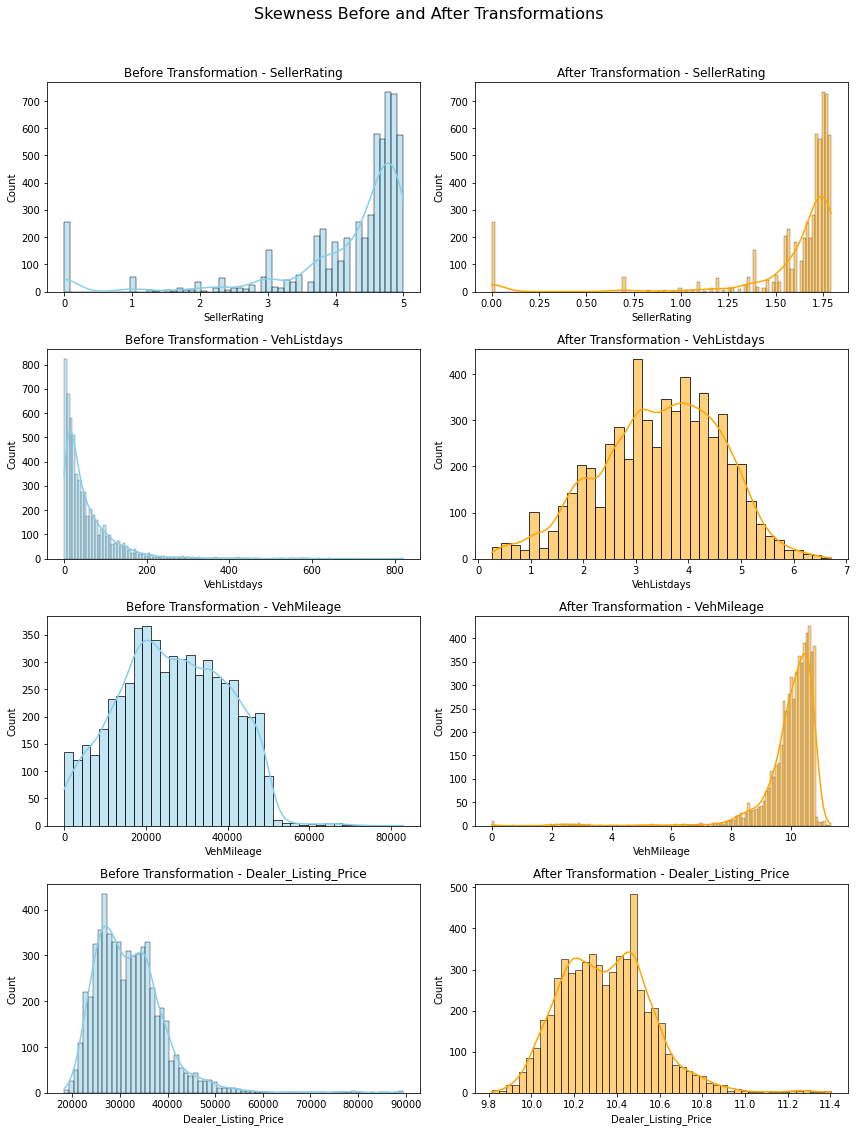

In [1169]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# List of variables
variables = ['SellerRating', 'VehListdays', 'VehMileage', 'Dealer_Listing_Price']

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle('Skewness Before and After Transformations', fontsize=16)

# Loop through each variable
for i, variable in enumerate(variables):
    # Plot before transformation
    sns.histplot(train_cleared[variable], ax=axes[i, 0], color='skyblue', kde=True)
    axes[i, 0].set_title(f'Before Transformation - {variable}')

    # Plot after transformation
    transformed_variable = np.log1p(train_cleared[variable])
    sns.histplot(transformed_variable, ax=axes[i, 1], color='orange', kde=True)
    axes[i, 1].set_title(f'After Transformation - {variable}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- Looks like LOG transformation helped to improve skewness in **Vehicle Listing Days and Price**. I will trasnform them.
- For the SellerRatings and VehMilage, I will them keep it as is.



In [1170]:
train_cleared['SellerRating']=train.SellerRating

In [726]:
train_cleared['VehListdays']=pd.DataFrame(np.log1p(train_cleared['VehListdays']))

In [1171]:
train_cleared['Dealer_Listing_Price']=pd.DataFrame(np.log1p(train_cleared['Dealer_Listing_Price']))

In [1172]:
# Removing the 0 scored rating:
train_cleared = train_cleared[train_cleared['SellerRating'] != 0]

**Checking the Seller Review Counts : "SellerRevCnt" :**

<Axes: ylabel='Frequency'>

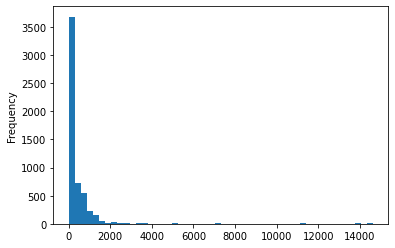

In [1174]:
#There are seller who received very high number of reviews, this also shows the reliability of their rating.
train_cleared.SellerRevCnt.plot.hist(bins=50)

**It is good to break them into groups from 1-very low to 5-very high

In [1175]:
train_cleared.SellerRevCnt.value_counts().to_dict();

In [1176]:
#cutting it into 5 classes,add the new column to our data then apply one hot encoding.
bins = [0, 300, 750, 1500, 2000, float('inf')]
labels = ['very low', 'low', 'medium', 'high', 'very high']

#replace the review numbers with labels
train_cleared['SellerRevCnt_Categories'] = pd.cut(train_cleared['SellerRevCnt'], bins=bins, labels=labels)



In [1177]:
#Apply encoding:

train_cleared = pd.get_dummies(train_cleared, columns=['SellerRevCnt_Categories'])


In [1178]:
train_cleared.columns.to_list()

['SellerIsPriv',
 'SellerRating',
 'SellerRevCnt',
 'VehCertified',
 'VehListdays',
 'VehMileage',
 'Vehicle_Trim',
 'Dealer_Listing_Price',
 'black_INT',
 'beige_INT',
 'gray_INT',
 'brown_INT',
 'red_INT',
 'other_INT',
 'Accident(s) Reported',
 '3 Owners',
 '2 Owners',
 'Buyback Protection Eligible',
 'Non-Personal Use Reported',
 '0 Owners',
 'NO_HISTORY',
 '1 Owner',
 '4 Owners',
 'Title Issue(s) Reported',
 'black_Ext',
 'white_Ext',
 'brown_Ext',
 'silver_Ext',
 'red_Ext',
 'blue_Ext',
 'other_Ext',
 'Gas',
 'JEEP',
 'SellerListSrc_Digital Motorworks (DMi)',
 'SellerListSrc_HomeNet Automotive',
 'SellerListSrc_Inventory Command Center',
 'SellerListSrc_Jeep Certified Program',
 'SellerListSrc_My Dealer Center',
 'SellerListSrc_Sell It Yourself',
 'VehDriveTrain_4WD',
 'VehDriveTrain_AWD',
 'VehDriveTrain_FWD',
 'VehEngine_Other',
 'VehEngine_V6',
 'VehEngine_V8',
 'VehPriceLabel_Fair Price',
 'VehPriceLabel_Good Deal',
 'VehPriceLabel_Great Deal',
 'VehYear_2015',
 'VehYear_2016

### The features in the data set and actions taken during data preperation :

In [1179]:
train_cleared=train_cleared.drop('SellerIsPriv',axis=1)

In [1180]:
train_cleared=train_cleared.drop('SellerListSrc_Sell It Yourself',axis=1)

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/3132723265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  TrainCorr = train_cleared.corr('spearman')


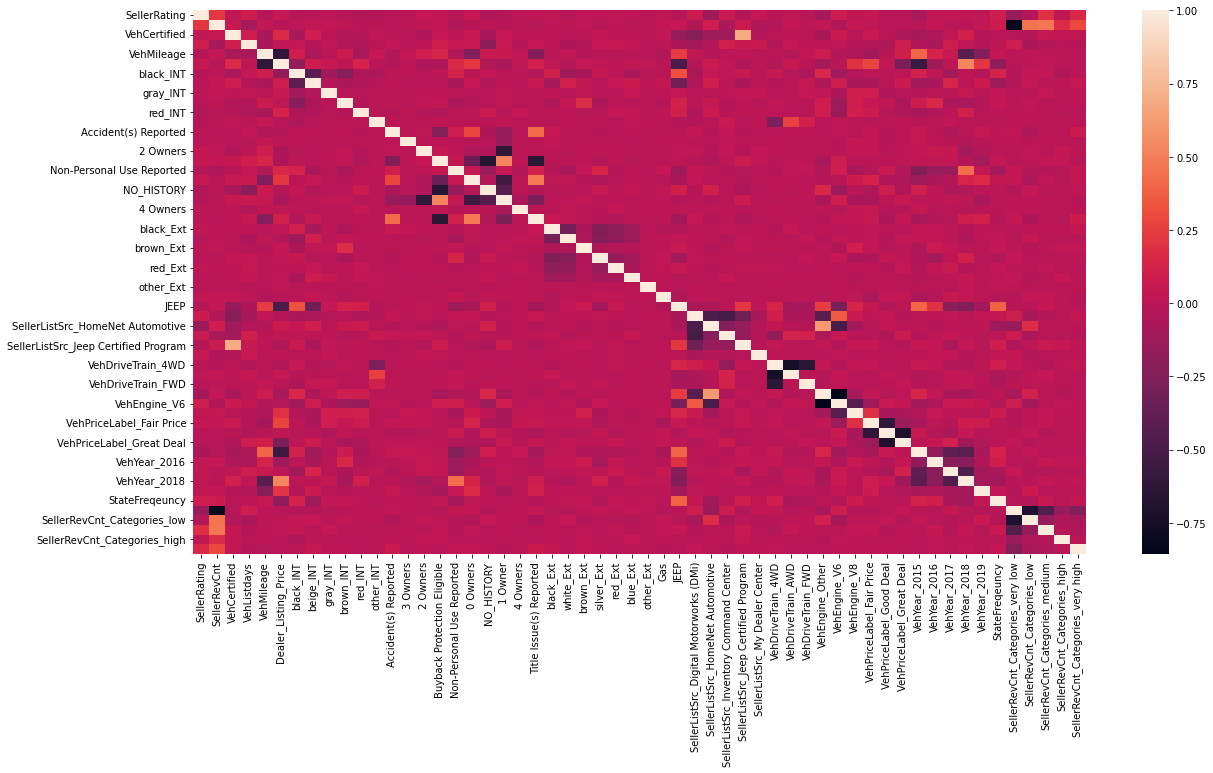

In [1181]:
plt.figure(figsize=(20,10))
TrainCorr = train_cleared.corr('spearman')
sns.heatmap(TrainCorr, annot = False)
plt.show()

In [1182]:
TrainCorr['Dealer_Listing_Price'].abs().sort_values(ascending=False).head(10)


Dealer_Listing_Price        1.000000
VehMileage                  0.617333
VehYear_2015                0.571900
VehYear_2018                0.534896
JEEP                        0.494039
VehPriceLabel_Fair Price    0.280826
VehPriceLabel_Great Deal    0.276851
0 Owners                    0.217425
VehYear_2019                0.214268
VehEngine_V8                0.199229
Name: Dealer_Listing_Price, dtype: float64

In [1183]:
train_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5584 entries, 0 to 6297
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SellerRating                            5584 non-null   float64
 1   SellerRevCnt                            5584 non-null   int64  
 2   VehCertified                            5584 non-null   int64  
 3   VehListdays                             5584 non-null   float64
 4   VehMileage                              5584 non-null   float64
 5   Vehicle_Trim                            5584 non-null   object 
 6   Dealer_Listing_Price                    5584 non-null   float64
 7   black_INT                               5584 non-null   int64  
 8   beige_INT                               5584 non-null   int64  
 9   gray_INT                                5584 non-null   int64  
 10  brown_INT                               5584 non-null   int6

In [1184]:
train_cleared.Vehicle_Trim.value_counts().index.to_list()

['Limited',
 'Premium Luxury',
 'Laredo',
 'Luxury',
 'Overland',
 'Altitude',
 'Summit',
 'Trailhawk',
 'Base',
 'Platinum',
 'High Altitude',
 'SRT',
 'FWD',
 'Luxury FWD',
 'Laredo E',
 'Premium Luxury FWD',
 'Trackhawk',
 'Sterling Edition',
 'Luxury AWD',
 'Platinum AWD',
 'Premium Luxury AWD',
 '75th Anniversary',
 'Limited 75th Anniversary Edition',
 'SRT Night',
 'Upland',
 'Limited 4x4',
 '75th Anniversary Edition',
 'Limited 75th Anniversary',
 'Limited X']

In [1185]:
#encoding these labels into numerical values:

from sklearn.preprocessing import LabelEncoder

label_encoder_VehTrim = LabelEncoder()
train_cleared['Vehicle_Trim'] = label_encoder_VehTrim.fit_transform(train_cleared['Vehicle_Trim'])


In [1186]:
train_cleared['Vehicle_Trim'].value_counts();

In [1189]:
train_cleared.columns.to_list();

In [1422]:
train_cleared=pd.get_dummies(train_cleared,columns=['JEEP','Gas']);

In [1193]:
#Normalizing the floating columns, remember Listing Days was log transformed earlier"

normalized_columns=['SellerRating','SellerRevCnt','VehListdays','VehMileage']
scaler=StandardScaler()

In [1194]:
train_cleared[normalized_columns]=scaler.fit_transform(train_cleared[normalized_columns])

In [1195]:
TrainCorr = train_cleared.corr('spearman')
Price_Corr=TrainCorr['Dealer_Listing_Price'].abs().sort_values(ascending=False)
Trim_Corr=TrainCorr['Vehicle_Trim'].abs().sort_values(ascending=False)
#Top 10 features:
print(Price_Corr[:10],'\n\n*************\n',Trim_Corr[:10])

Dealer_Listing_Price        1.000000
Vehicle_Trim                0.650379
VehMileage                  0.617333
VehYear_2015                0.571900
VehYear_2018                0.534896
JEEP_0                      0.494039
JEEP_1                      0.494039
VehPriceLabel_Fair Price    0.280826
VehPriceLabel_Great Deal    0.276851
0 Owners                    0.217425
Name: Dealer_Listing_Price, dtype: float64 

*************
 Vehicle_Trim                1.000000
Dealer_Listing_Price        0.650379
JEEP_0                      0.385472
JEEP_1                      0.385472
VehYear_2018                0.315799
VehYear_2015                0.313510
red_INT                     0.254193
VehPriceLabel_Great Deal    0.206248
VehMileage                  0.201207
VehEngine_V8                0.199304
Name: Vehicle_Trim, dtype: float64


In [1196]:
#Now lets check for skewness:

Skewness_All=train_cleared.skew()

In [1197]:
Skewness_All;

## <font color='blue'>VEHICLE TRIM CLASSIFICATION MODEL: </font>  

In [1198]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_recall_curve,roc_curve,precision_score,recall_score

In [1199]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    print(cm)
    plt.figure(figsize=(12,7))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual',fontsize=18)
    plt.xlabel('Predicted',fontsize=18)
    plt.show()

In [1464]:
train_clear=process_data(train)
test_clear=process_data(test)

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/308314781.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VehDriveTrain'].iloc[i] = value
/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/308314781.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VehEngine'].iloc[i]=value
/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/308314781.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [1465]:
new_df = pd.DataFrame(columns=test_clear.columns)

for column in test_clear.columns:
    if column in train_clear.columns:
        new_df[column] = train_clear[column].fillna(0)
    else:
        new_df[column] = 0
X_train=new_df

In [1466]:
#Getting out Train Set, and Target for "Vehicle TRIM":
# X_train=train_clear.drop(columns=['Vehicle_Trim','Dealer_Listing_Price'],axis=1)
y_train=train_clear['Vehicle_Trim']

### Future Selection using SelecktKBest:

In [1467]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 15)
#New dataframe with the selected features for later use in the classifier. 
#fit() method works too, if you want only the feature names and their corresponding scores
X_train_selected = selector.fit_transform(X_train, y_train)

names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores'], ascending = [False])
print(ns_df_sorted)

                          Feat_names    F_Scores
13                            JEEP_0         inf
14                            JEEP_1         inf
3                            red_INT  274.798126
7                       VehEngine_V8   75.377259
1                          beige_INT   73.667719
0                          black_INT   64.781433
11                      VehYear_2018   63.339773
9                       VehYear_2015   59.158456
6                       VehEngine_V6   44.891698
8           VehPriceLabel_Fair Price   43.081626
5   SellerListSrc_HomeNet Automotive   42.194793
10                      VehYear_2017   36.370850
2                          brown_INT   34.894197
12                    StateFreqeuncy   32.192707
4          Non-Personal Use Reported   31.779490


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [27 53 54] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [1490]:
#Here I will split the given training set into train and validation set to optimize the performance:
from sklearn.model_selection import train_test_split

X_tr,X_val,y_tr,y_val=  train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_tr_selected,X_val_selected,y_tr_selected,y_val_selected=train_test_split(X_train[ns_df_sorted['Feat_names']], y_train, test_size=0.2, random_state=42)


**Base Model** Logistic Regression

In [1491]:
LR=LogisticRegression(max_iter=1000,solver='liblinear',random_state=11)



In [1492]:
LR.fit(X_tr,y_tr)

LogisticRegression(max_iter=1000, random_state=11, solver='liblinear')

In [1493]:
y_hat_LR=LR.predict(X_tr)
y_val_hat_LR=LR.predict(X_val)


In [1494]:
#Base Model Accuracy:
LR_tr_accuracy=accuracy_score(y_tr,y_hat_LR)
LR_val_accuracy=accuracy_score(y_val,y_val_hat_LR)
print('LR_Training_accuracy :',LR_tr_accuracy)
print('LR_Validation_accuracy :',LR_val_accuracy)

LR_Training_accuracy : 0.6055518244907097
LR_Validation_accuracy : 0.5792300805729633


In [1495]:
#using the selected features only:
LR.fit(X_tr_selected,y_tr_selected)

y_hat_selected_LR=LR.predict(X_tr_selected)
y_val_hat_selected_LR=LR.predict(X_val_selected)


In [1496]:
LR_tr_accuracy_selected=accuracy_score(y_tr_selected,y_hat_selected_LR)
LR_val_accuracy_selected=accuracy_score(y_val_selected,y_val_hat_selected_LR)
print('LR_Training_accuracy :',LR_tr_accuracy_selected)
print('LR_Validation_accuracy :',LR_val_accuracy_selected)

LR_Training_accuracy : 0.5576449518692634
LR_Validation_accuracy : 0.540734109221128


**RANDOM FOREST:**

In [1497]:
RF=RandomForestClassifier(random_state=11)

In [1498]:
RF.fit(X_tr,y_tr)

RandomForestClassifier(random_state=11)

In [1499]:
y_hat_RF=RF.predict(X_tr)
y_val_hat_RF=RF.predict(X_val)
RF_tr_accuracy=accuracy_score(y_tr,y_hat_RF)
RF_val_accuracy=accuracy_score(y_val,y_val_hat_RF)
print('RF_Training_accuracy :',RF_tr_accuracy)
print('RF_Validation_accuracy :',RF_val_accuracy)

RF_Training_accuracy : 1.0
RF_Validation_accuracy : 0.631154879140555


In [1500]:
#using the selected features only:
RF.fit(X_tr_selected,y_tr_selected)

y_hat_selected_RF=RF.predict(X_tr_selected)
y_val_hat_selected_RF=RF.predict(X_val_selected)


In [1501]:
RF_tr_accuracy_selected=accuracy_score(y_tr_selected,y_hat_selected_RF)
RF_val_accuracy_selected=accuracy_score(y_val_selected,y_val_hat_selected_RF)
print('RF_Training_accuracy_selected:',RF_tr_accuracy_selected)
print('RF_Validation_accuracy_selected :',RF_val_accuracy_selected)

RF_Training_accuracy_selected: 0.6959928363554958
RF_Validation_accuracy_selected : 0.5228290062667861


**DECISION TREE:**

In [1480]:
DT=DecisionTreeClassifier(random_state=3)

In [1481]:
DT.fit(X_tr[ns_df_sorted['Feat_names']],y_tr)

DecisionTreeClassifier(random_state=3)

In [1482]:
y_hat_DT=DT.predict(X_tr[ns_df_sorted['Feat_names']])

In [1483]:
DT_train_accuracy=accuracy_score(y_tr,y_hat_DT)
DT_train_accuracy

0.6959928363554958

**XGBOOST CLASSIFIER:**

In [1484]:
pip install xgboost;

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1485]:
import xgboost as xgb

In [1486]:
len(train_cleared['Vehicle_Trim'].value_counts())

29

In [1487]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dtest = xgb.DMatrix(X_val, label=y_val)
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 29,  # Number of classes
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'merror',# Classification error metric
    'random_state':3 
}

# Train the XGBoost model
num_rounds = 1000
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_tr_hat_XGB = model.predict(dtrain)

y_val_hat_XGB = model.predict(dtest)



ValueError: could not convert string to float: 'High Altitude'

In [1380]:
# Evaluate accuracy
Train_Accuracy = accuracy_score(y_tr, y_tr_hat_XGB)
Validation_Accuracy=accuracy_score(y_val, y_val_hat_XGB)
print('Train_Accuracy:', Train_Accuracy)
print('Validation_Accuracy:',Validation_Accuracy)

Train_Accuracy: 0.9832102081934184
Validation_Accuracy: 0.6060877350044763


##### The selected features did not improve the result. RF with the entire set performed better than others and reached 63% accuracy in the validation set.

### PARAMETER TUNING FOR RF:

In [1420]:

from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Use GridSearchCV to search for the best parameters
# grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_tr,y_tr)

# # Print the best parameters and the corresponding accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


In [1488]:
RF_tuned=RandomForestClassifier(**grid_search.best_params_)

In [1489]:
RF_tuned.fit(X_tr,y_tr)
y_hat_RF_tuned=RF_tuned.predict(X_tr)
y_val_hat_RF_tuned=RF_tuned.predict(X_val)
RF_tuned_tr_accuracy=accuracy_score(y_tr,y_hat_RF_tuned)
RF_tuned_val_accuracy=accuracy_score(y_val,y_val_hat_RF_tuned)
print('RF_tuned_Training_accuracy :',RF_tuned_tr_accuracy)
print('RF_tuned_Validation_accuracy :',RF_tuned_val_accuracy)

RF_tuned_Training_accuracy : 0.9740317886724871
RF_tuned_Validation_accuracy : 0.6266786034019696


Tunin did not improve the results ! So I will keep the RF classifier..

## <font color='blue'>DEALER PRICE REGRESSION MODEL: </font>  

In [1277]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1503]:
y_train_reg=train_cleared['Dealer_Listing_Price']
X_tr,X_val,y_tr_reg,y_val_reg= train_test_split(X_train, y_train_reg, test_size=0.2, random_state=42)

# I will not use selected features.


**RANDOM FOREST REGRESSOR:**

In [1504]:
RFR=RandomForestRegressor(random_state=11)

In [1505]:
RFR.fit(X_tr,y_tr_reg)

RandomForestRegressor(random_state=11)

In [1506]:

y_tr_hat_RFR=RFR.predict(X_tr)

In [1507]:

print('Trainig Set')
print('R2 score:',r2_score(y_tr_hat_RFR,y_tr_reg))
print('MEA score: ',mean_absolute_error(y_tr_hat_RFR,y_tr_reg))

Trainig Set
R2 score: 0.9601066493202286
MEA score:  0.026927809559350577


In [1395]:
y_val_hat_RFR=RFR.predict(X_val)

In [1396]:


print('Validation Set')
print('R2 score:',r2_score(y_val_hat_RFR,y_val_reg))
print('MEA score: ',mean_absolute_error(y_val_hat_RFR,y_val_reg))

Validation Set
R2 score: 0.7122400719361638
MEA score:  0.07276423330497281


**XGBOOST REGRESSOR:**

In [1326]:
XGBR = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 7, alpha = 10, n_estimators = 15)


In [1327]:
XGBR.fit(X_tr[ns_df_sorted['Feat_names']],y_tr_reg)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [1329]:
y_hat_XGBR=XGBR.predict(X_tr[ns_df_sorted['Feat_names']])

In [1330]:
r2_score(y_tr_reg,y_hat_XGBR)

-89.76491949266172

In [1331]:
mean_squared_error(y_tr_reg,y_hat_XGBR)

4.1680730743849495

Random Forest is doing better in this regression analysis, both for the selected features and for the entire data set.

### PARAMETER TUNING FOR THE RF REGRESSOR:

In [1408]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error');
grid_search.fit(X_tr, y_tr_reg);


In [1409]:
RFR_tuned=RandomForestRegressor(**grid_search.best_params_)

In [1410]:
RFR_tuned.fit(X_tr,y_tr_reg)
y_tr_hat_RFR_tuned=RFR_tuned.predict(X_tr)
print('Trainig Set')
print('R2 score:',r2_score(y_tr_hat_RFR_tuned,y_tr_reg))
print('MEA score: ',mean_absolute_error(y_tr_hat_RFR_tuned,y_tr_reg))
y_val_hat_RFR_tuned=RFR_tuned.predict(X_val)
print('Validation Set')
print('R2 score:',r2_score(y_val_hat_RFR_tuned,y_val_reg))
print('MEA score: ',mean_absolute_error(y_val_hat_RFR_tuned,y_val_reg))

Trainig Set
R2 score: 0.9476846843018588
MEA score:  0.031651323897435114
Validation Set
R2 score: 0.6531417600951207
MEA score:  0.07229674437763259


- Again tuning did not perform better, so I will keep the RFR regressor.

## APPYLING ON THE TEST DATA :

In [1508]:
#using the function code process_da at the end

X_test=process_data(test)

/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/308314781.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VehDriveTrain'].iloc[i] = value
/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_29478/308314781.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VehEngine'].iloc[i]=value


In [1512]:
X_tr.columns.to_list()

['SellerRating',
 'SellerRevCnt',
 'VehCertified',
 'VehListdays',
 'VehMileage',
 'black_INT',
 'beige_INT',
 'gray_INT',
 'brown_INT',
 'red_INT',
 'other_INT',
 'Accident(s) Reported',
 '3 Owners',
 '2 Owners',
 'Buyback Protection Eligible',
 'Non-Personal Use Reported',
 '0 Owners',
 'NO_HISTORY',
 '1 Owner',
 'Title Issue(s) Reported',
 'black_Ext',
 'white_Ext',
 'brown_Ext',
 'silver_Ext',
 'red_Ext',
 'blue_Ext',
 'other_Ext',
 'SellerListSrc_Cadillac Certified Program',
 'SellerListSrc_Digital Motorworks (DMi)',
 'SellerListSrc_HomeNet Automotive',
 'SellerListSrc_Inventory Command Center',
 'SellerListSrc_Jeep Certified Program',
 'SellerListSrc_My Dealer Center',
 'VehDriveTrain_4WD',
 'VehDriveTrain_AWD',
 'VehDriveTrain_FWD',
 'VehEngine_Other',
 'VehEngine_V6',
 'VehEngine_V8',
 'VehPriceLabel_Fair Price',
 'VehPriceLabel_Good Deal',
 'VehPriceLabel_Great Deal',
 'VehYear_2015',
 'VehYear_2016',
 'VehYear_2017',
 'VehYear_2018',
 'VehYear_2019',
 'StateFreqeuncy',
 'Sell

In [1521]:
#Classification using RF:
from sklearn.ensemble import HistGradientBoostingClassifier
HGB=HistGradientBoostingClassifier()
HGB.fit(X_tr,y_tr)
Trim_prediction=HGB.predict(X_test)

In [1523]:
#Regression Using RFR:
#Classification using RF:
from sklearn.ensemble import HistGradientBoostingRegressor
HGBR=HistGradientBoostingRegressor()
HGBR.fit(X_tr,y_tr_reg)


Price_Prediction=HGBR.predict(X_test)

In [1532]:
Results=pd.DataFrame()
Results['ListingID']=test['ListingID']
Results['TRIMS']=Trim_prediction
Results['PRICES']=np.exp(Price_Prediction)
    
Results.to_csv('/Users/murat/Desktop/Results.csv')


## SUMMARY OF ACTIONS TAKEN:


Categorical columns encoded: ['SellerListSrc', 'VehDriveTrain', 'VehEngine', 'VehPriceLabel', 'VehYear']




ListingID                      5839 >> Removed

SellerCity                     1235 >> Removed, STATE IS ENOUGH TO KEEP !

SellerIsPriv                      2 >> BOOLEAN Transfered into **Binary**, BUT ALL 0, so removed! 

SellerListSrc                     6 >> **Categorical**

SellerName                     2245 >> Removed

SellerRating                     40 >> Cont >> 0 Scores removed!

SellerRevCnt                    793 >> Cont >> Divided into 5 Bins, Labeled (very low..very high) and Encoded

SellerState                      50 >> FREQUENCY ENCODED, then Removed original

SellerZip                      1696 >> Removed

VehBodystyle                      1 >> Remove, ALL USED !!

VehCertified                      2 >> BOOLEAN Transfered into **Binary**

VehColorExt                     167 >>  Removed, Encoded

VehColorInt                     103 >> Removed, Encoded

VehDriveTrain                     3 >> **Categorical**

VehEngine                         3 >> **Categorical**

VehFuel                           4 >> **Categorical**, reduced to Binary for Gas(1/0) vs Diesel

VehListdays                    5561 >> Cont

VehMake                           2 >> **Binary**, reduced to Binary for Jeep(1/0) vs Cadillac

VehMileage                     4893 >> Cont

VehModel                          2 >> **Binary**, REMOVED! Same info as VehMake

VehPriceLabel                     3 >> **Categorical**encoded

VehType                           1 >> Removed, ALL SUV!!

VehYear                           5 >> **Categorical** encoded

Vehicle_Trim                     29 >> **Categorical**  TARGET for CLASSIFICATION !!!

Dealer_Listing_Price           2717 >> Cont TARGET for REGRESSION !!! >> LOG trandformation applied!

Accident(s) Reported              2 >> **Binary**

3 Owners                          2 >> **Binary**

2 Owners                          2 >> **Binary**

Buyback Protection Eligible       2 >> **Binary**

0 Owners                          2 >> **Binary**

Non-Personal Use Reported         2 >> **Binary**

NO_HISTORY                        2 >> **Binary**

1 Owner                           2 >> **Binary**

4 Owners                          2 >> **Binary**

Title Issue(s) Reported           2 >> **Binary**


### TEST DATA PREPERATION: 

In [1416]:
def process_data(df):
    #inital clean up
    df=df.drop(columns=['ListingID','SellerCity','SellerName','SellerZip','VehSellerNotes','VehFeats','VehTransmission','VehBodystyle','VehType','SellerIsPriv',], axis=1);
    #imputation with mode
    columns = ['SellerListSrc', 'VehFuel', 'VehListdays']
    for column in columns:
        mostcommon_df = df[column].mode()[0]
        
        df[column].fillna(mostcommon_df, inplace=True)
    #dropping missing values
    
    if ('Vehicle_Trim' in df.columns) & ('Dealer_Listing_Price' in df.columns):
        df=df.dropna(subset=['Vehicle_Trim', 'Dealer_Listing_Price'])
    else: pass
    #Interior Color:
    df["VehColorInt"]=df["VehColorInt"].fillna('Black');
    intcolor = ['black', 'beige', 'gray', 'brown', 'red', 'other']

    for x in intcolor:
        df[x+'_INT'] = df['VehColorInt'].apply(lambda Vecint: 1 if isinstance(Vecint, str) and x in Vecint.lower() else 0)
    ##############
    df=df.drop(columns='VehColorInt',axis=1);
    #Vehicle History:
    df['VehHistory']=df['VehHistory'].fillna('NO_HISTORY');
    history = []
    for x in df['VehHistory']:
        if isinstance(x, str):
            history.extend(x.split(','))
    history=set(history)
    history.add('NO_HISTORY')
    for category in history:
        df[category.strip()] = df['VehHistory'].apply(lambda x: 1 if (isinstance(x, str) and category in x) else 0)
    df=df.drop('VehHistory', axis=1)
    #Vehicle Prices:
    df['VehPriceLabel']=df['VehPriceLabel'].fillna('Good Deal');
    #Vehicle Exterior Color:
    df['VehColorExt']=df['VehColorExt'].fillna("Other")
    extcolor = ['black','white','brown','silver','red','blue','other']

    for x in extcolor:
        df[x+'_Ext'] = df['VehColorExt'].apply(lambda col: 1 if isinstance(col, str) and x in col.lower() else 0)
    df=df.drop('VehColorExt',axis=1)
    #Drive Train:
    for i, x in enumerate(df['VehDriveTrain']):
        if isinstance(x, str):
            x_lower = x.lower() 

            if 'all' in x_lower:
                value = 'AWD'
            elif 'four' in x_lower or '4x4' in x_lower:
                value = '4WD'
            elif 'front' in x_lower:
                value = 'FWD'
            else:
                value = '4WD'
        else:
            value = '4WD'

        df['VehDriveTrain'].iloc[i] = value
        
    #Vehicle Engine:
    for i, engine in enumerate(df['VehEngine']):
        if isinstance(engine, str):
            engine = str(engine).lower() 

            if 'v6' in engine or ('6' and 'cyl' in engine):
                value= 'V6'
            elif 'v8' in engine or ('8' and 'cyl' in engine):
                value= 'V8'
            elif 'v4' in engine or ('4' and 'cyl' in engine):
                value= 'V4'
            else:
                value= 'Other'
        else: value= "Other"
        df['VehEngine'].iloc[i]=value
        
    #Veh  Featuress: DROPPED!
    #Seller notes: DROPPED!
    #Transmission: Dropped!
    #'VehBodystyle','VehType' DROPPED!
    #Seller Pri: Dropped
    #Vehertified: binarized as int

    df['VehCertified']=df['VehCertified'].astype(int);
    #VEh Fuel:
    df['Gas']=df['VehFuel'].apply(lambda x:0 if x == 'Diesel' else 1)
    df=df.drop('VehFuel',axis=1)
    #WehMake:
    df['JEEP']=df['VehMake'].apply(lambda x:1 if x == 'Jeep' else 0)
    df=df.drop('VehMake',axis=1)
    df=df.drop('VehModel',axis=1)
    
    #ENCODING:
    #One-Hot encoding for the categoricals:
    categoricals=['SellerListSrc', 'VehDriveTrain', 'VehEngine', 'VehPriceLabel', 'VehYear']
    
    df=pd.get_dummies(df, columns=categoricals)

    #Seller State:
    sellersinstates=df.SellerState.value_counts()
    #before maping it to the frequencies we get the dictionary ready
    seller_state_frequency = sellersinstates.to_dict()
    #now we can generate a column with state frequencies:
    df['StateFreqeuncy']=df['SellerState'].map(seller_state_frequency)
    df=df.drop('SellerState',axis=1)
    
    #Data Continous, Skewness:
    df['VehListdays']=pd.DataFrame(np.log1p(df['VehListdays']))
    if 'Dealer_Listing_Price' in df.columns:
        df['Dealer_Listing_Price']=pd.DataFrame(np.log1p(df['Dealer_Listing_Price']))
   
    # Removing the 0 scored rating:
    
    if 'Dealer_Listing_Price' in df.columns:
        df = df[df['SellerRating'] != 0]
    
    #Seller Review Counts:
    #cutting it into 5 classes,add the new column to our data then apply one hot encoding.
    bins = [0, 300, 750, 1500, 2000, float('inf')]
    labels = ['very low', 'low', 'medium', 'high', 'very high']

    #replace the review numbers with labels
    df['SellerRevCnt_Categories'] = pd.cut(df['SellerRevCnt'], bins=bins, labels=labels)


    df = pd.get_dummies(df, columns=['SellerRevCnt_Categories'])
    #The seller is dealer so remove private cases:
    
    df=df.drop('SellerListSrc_Sell It Yourself',axis=1)
    
    df=pd.get_dummies(df,columns=['JEEP','Gas'])
    #Normalizing the floating columns, remember Listing Days was log transformed earlier"

    normalized_columns=['SellerRating','SellerRevCnt','VehListdays','VehMileage']
    scaler=StandardScaler()
    df[normalized_columns]=scaler.fit_transform(df[normalized_columns])
    
    return df 
    
    
    